# Hands on LAB - Machine Learning - COURSERA

This notebook records the main practices of Machine Learning the IBM Data Science professional certification.

#### Clustering
I | K-Means

J | Hierarchical

K | Density-Based Clustering

#### Recommendation Systems

L | Content Based Filtering

M | Collaborative Filtering

# I | 1 | K-Means

Despite its simplicity, the K-means is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from unlabeled data.

In [1]:
# Load required libraries
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

/Users/thiagocarvalho/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


##  k-means on a randomly generated dataset

In [2]:
# create the dataset
np.random.seed(0)

##### Making random clusters of points by using the make_blobs class and the following inputs:

n_samples: The total number of points equally divided among clusters.
Value will be: 5000
centers: The number of centers to generate, or the fixed center locations.
Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]
cluster_std: The standard deviation of the clusters.
Value will be: 0.9


In [4]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

##### Output
X: Array of shape [n_samples, n_features]. (Feature Matrix)
The generated samples.
y: Array of shape [n_samples]. (Response Vector)
The integer labels for cluster membership of each sample.

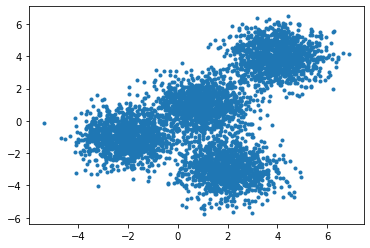

In [5]:
# Display the scatter plot of the randomly generated data.
plt.scatter(X[:, 0], X[:, 1], marker='.')

## Setting up K-Means

Using these three prameters (of many possibles):

- **init** Initialization method of the centroids. 
Value will be: "k-means++"   |   k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.


- **n_clusters**  The number of clusters to form as well as the number of centroids to generate. 
Value will be: 4 (since we have 4 centers)   |   

- **n_init**  Number of time the k-means algorithm will be run with different centroid seeds. 
The final results will be the best output of n_init consecutive runs in terms of inertia. Value will be: 12 



In [6]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [8]:
# fit the KMeans model
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [9]:
# label each point in the model using KMeans '.labels_' attribute and save it as k_means_labels 
k_means_labels = k_means.labels_
k_means_labels

array([0, 2, 2, ..., 1, 0, 0], dtype=int32)

In [10]:
## get the coordinates of the cluster centers using '.cluster_centers_' and save it as k_means_cluster_centers
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03375169, -0.99827293],
       [ 3.97334234,  3.98758687],
       [ 1.99876902, -3.01796355],
       [ 0.96959198,  0.98543802]])

## Creating the Visual Plot

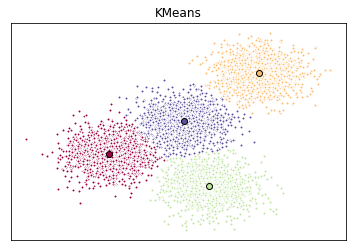

In [11]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


## Another attempt now with 3 clusters using the same random dataset generated above  

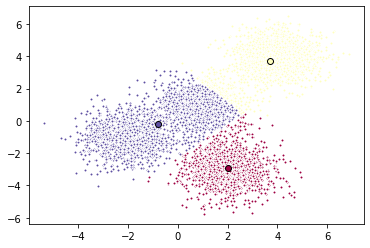

In [12]:
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

# I | 2 | Customer Segmentation with K-Means

## The Task - Apply customer segmentation on this historical data

In [14]:
import pandas as pd

In [15]:
# Read the file and assigning it to a data frame
folder = '/Users/thiagocarvalho/Documents/databases/'
cust_df  = pd.read_csv(folder+'Cust_Segmentation.csv')
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<h2 id="pre_processing">Pre-processing</h2


In [16]:
# k-means algorithm isn't directly applicable to categorical variables because 
# Euclidean distance function isn't really meaningful for discrete variables. 
# drop Address feature
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalizing over the standard deviation

In [17]:
# use StandardScaler() to normalize our dataset.
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

<h2 id="modeling">Modeling</h2>


In [18]:
# Apply k-means on our dataset, and take look at cluster labels
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 0 1 1 2 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 2 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 0 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 0 1 1 0 2 1 0 1 1 1 1 1 1 2 0 1 1 1 1 0 1 1 0 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 2 1 1 1 0 1 0 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 2
 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 0 1 2 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 

### Insights

In [19]:
# Assign the labels to each row in dataframe
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [20]:
# Check the centroid values by averaging the features in each cluster
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824
1,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


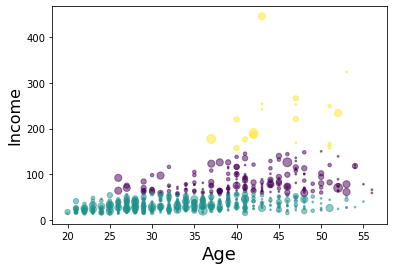

In [21]:
# Look at the distribution of customers based on their age and income
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

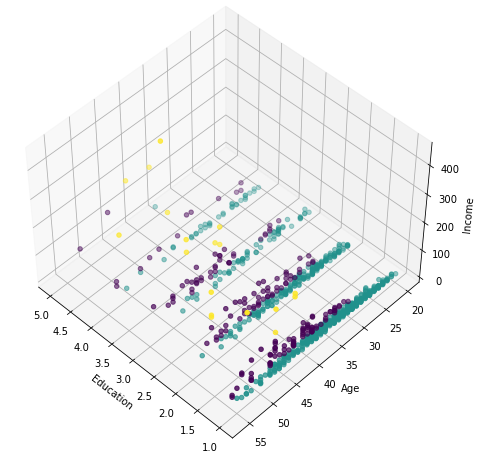

In [22]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. 
The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

-   AFFLUENT, EDUCATED AND OLD AGED
-   MIDDLE AGED AND MIDDLE INCOME
-   YOUNG AND LOW INCOME

# J | 1 | Hierarchical Clustering - Agglomerative

Agglomerative Hierarchical Clustering is the bottom up approach.
It is more popular than Divisive clustering. 

In this lab is used also the Complete Linkage as the Linkage Criteria.
NOTE: It is also possible to try Average Linkage wherever Complete Linkage would be used to see the difference. 

In [1]:
# Importing libraries
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

/Users/thiagocarvalho/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


### Generating Random Data
Generate a set of data using the **make_blobs** class. 

With Input these parameters:
- **n_samples:** The total number of points equally divided among clusters. Choose a number from 10-1500

- **centers:** The number of centers to generate, or the fixed center locations. Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]]) 

- **cluster_std:** The standard deviation of the clusters. The larger the number, the further apart the clusters. Choose a number between 0.5-1.5 

Save the result to **X1** and **y1**.

In [2]:
# Generating Random Data
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

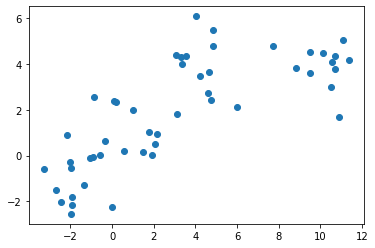

In [3]:
# plot the randomly generated data
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

### Agglomerative Clustering

The **Agglomerative Clustering** class will require two inputs:

- **n_clusters:** The number of clusters to form as well as the number of centroids to generate.  Value will be: 4 

- **linkage:** Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. Value will be: 'complete

Note: The following methods are supported in Scipy for calculating the distance between the newly formed cluster
- single
- complete --> minimizes the maximum distance between observations of pairs of clusters
- average  --> minimizes the average of the distances between all observations of pairs of clusters
- weighted
- centroid

In [4]:
# clustering the just created random data points with 'AglomerativeClustering' 
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [5]:
# Fit the model
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

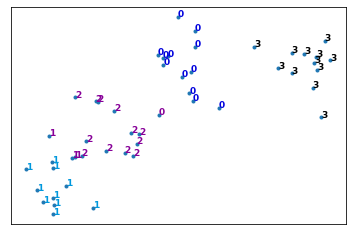

In [6]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

### Dendrogram Associated for the Agglomerative Hierarchical Clustering

A **distance matrix** contains the distance from each point to every other point of a dataset. 
The function **distance_matrix** requires **two inputs**. 

In [7]:
# Use X1 as both inputs and save the distance matrix to a variable called dist_matrix
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix) #he distance values are symmetric, with a diagonal of 0's

[[0.         0.2078409  1.02795862 ... 0.09119591 0.36623317 0.28567625]
 [0.2078409  0.         1.23575691 ... 0.12399382 0.52083184 0.38854741]
 [1.02795862 1.23575691 0.         ... 1.11465693 0.84449077 1.01077832]
 ...
 [0.09119591 0.12399382 1.11465693 ... 0.         0.40727473 0.34090031]
 [0.36623317 0.52083184 0.84449077 ... 0.40727473 0.         0.58983542]
 [0.28567625 0.38854741 1.01077832 ... 0.34090031 0.58983542 0.        ]]


Using the **linkage** class from hierarchy, pass in the parameters:
- The distance matrix: 'complete' for complete linkage 

In [8]:
# Linkage
Z = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-8-21a0673cd61b>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


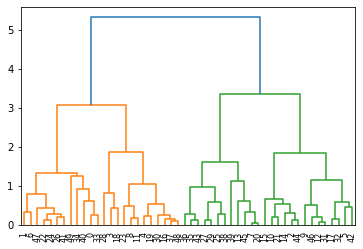

In [9]:
dendro = hierarchy.dendrogram(Z)

### Changing the linkage

<ipython-input-10-1fd290d595b4>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'average')


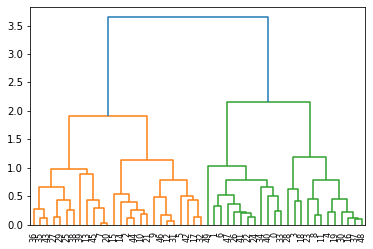

In [10]:
# use the average linkage
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)

# J | 2 | Hierarchical Clustering on Vehicle dataset

## The Task - Clustering on Vehicle dataset

An automobile manufacturer has developed prototypes for a new vehicle. 

Before introducing the new model into its range, the manufacturer wants to determine which existing vehicles on the market are most like the prototypes.

The objective here, is to use clustering methods, to find the most distinctive clusters of vehicles. It will summarize the existing vehicles and help manufacturers to make decision about the supply of new models.

In [11]:
# Read the file and assigning it to a data frame
folder = '/Users/thiagocarvalho/Documents/databases/'
pdf  = pd.read_csv(folder+'cars_clus.csv')
pdf.head() 

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


The feature sets include  price in thousands (price), engine size (engine_s), horsepower (horsepow), wheelbase (wheelbas), width (width), length (length), curb weight (curb_wgt), fuel capacity (fuel_cap) and fuel efficiency (mpg).


### Data Cleaning

In [12]:
# clear the dataset by dropping the rows that have null value

print ("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [13]:
# Select the feature set
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [14]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

### OPTION 1 - Clustering using Scipy

In [15]:
# Calculate the distance matrix.
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

<ipython-input-15-5be73d95825c>:4: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

In [16]:
# Calculating the distance between the newly formed cluster
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

<ipython-input-16-f5864b583b21>:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


Essentially, Hierarchical clustering does not require a pre-specified number of clusters. However, in some applications we want a partition of disjoint clusters just as in flat clustering.
So you can use a cutting line:


In [17]:
# Using cutting line

from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

In [18]:
# determine the number of clusters directly (Optional)

from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

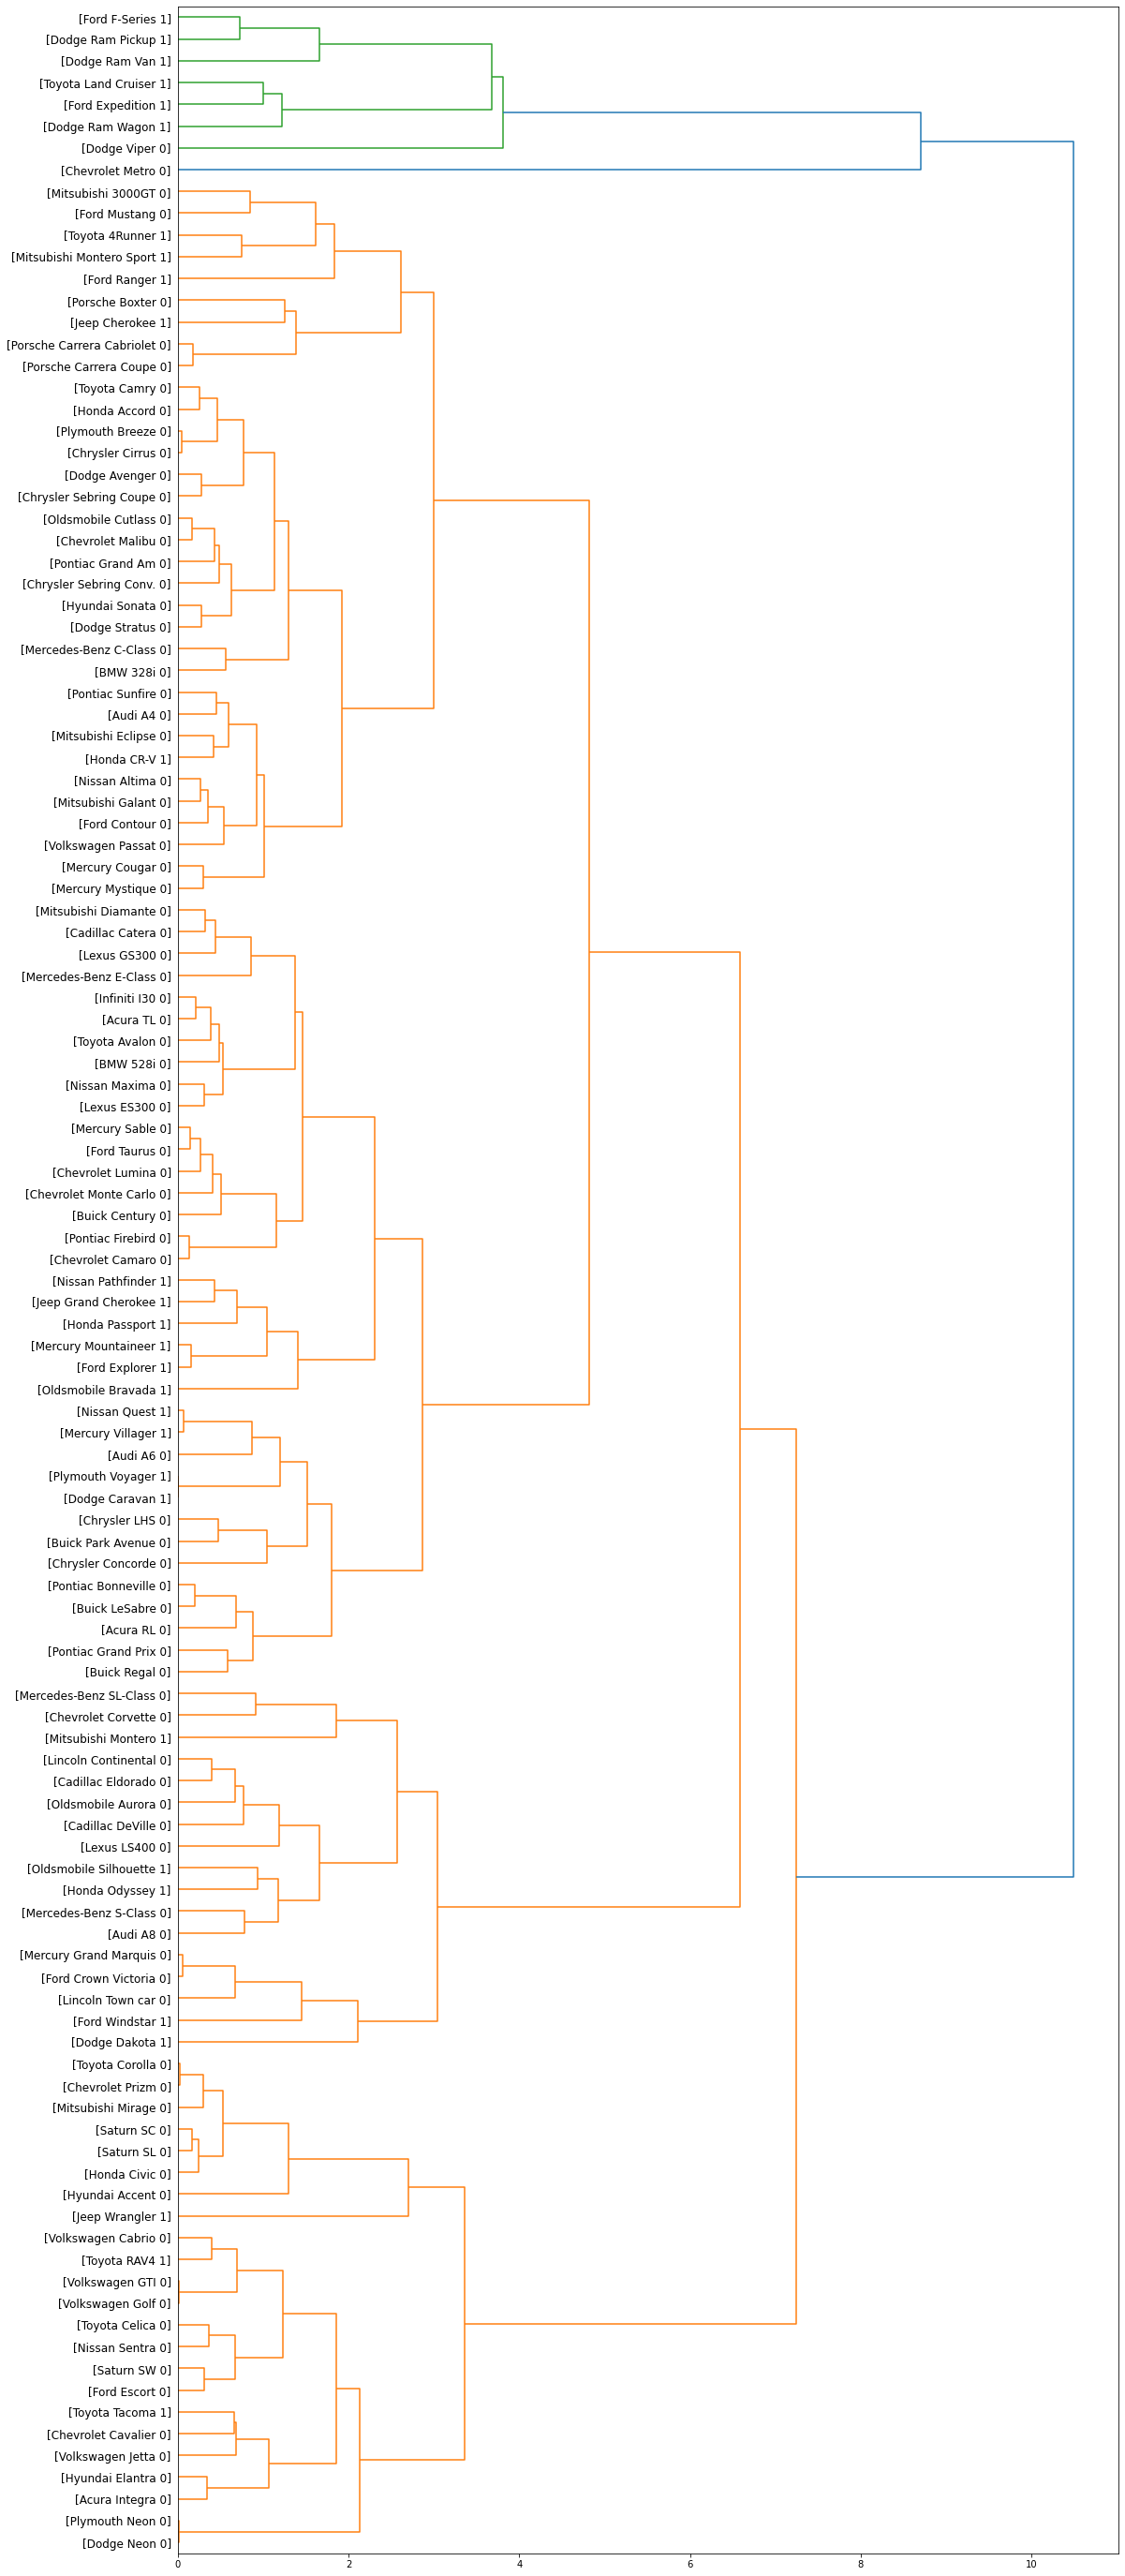

In [19]:
# Plot the dendrogram
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

### OPTION 2 - Clustering using scikit-learn

In [20]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [21]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-21-bf9ca02f569b>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


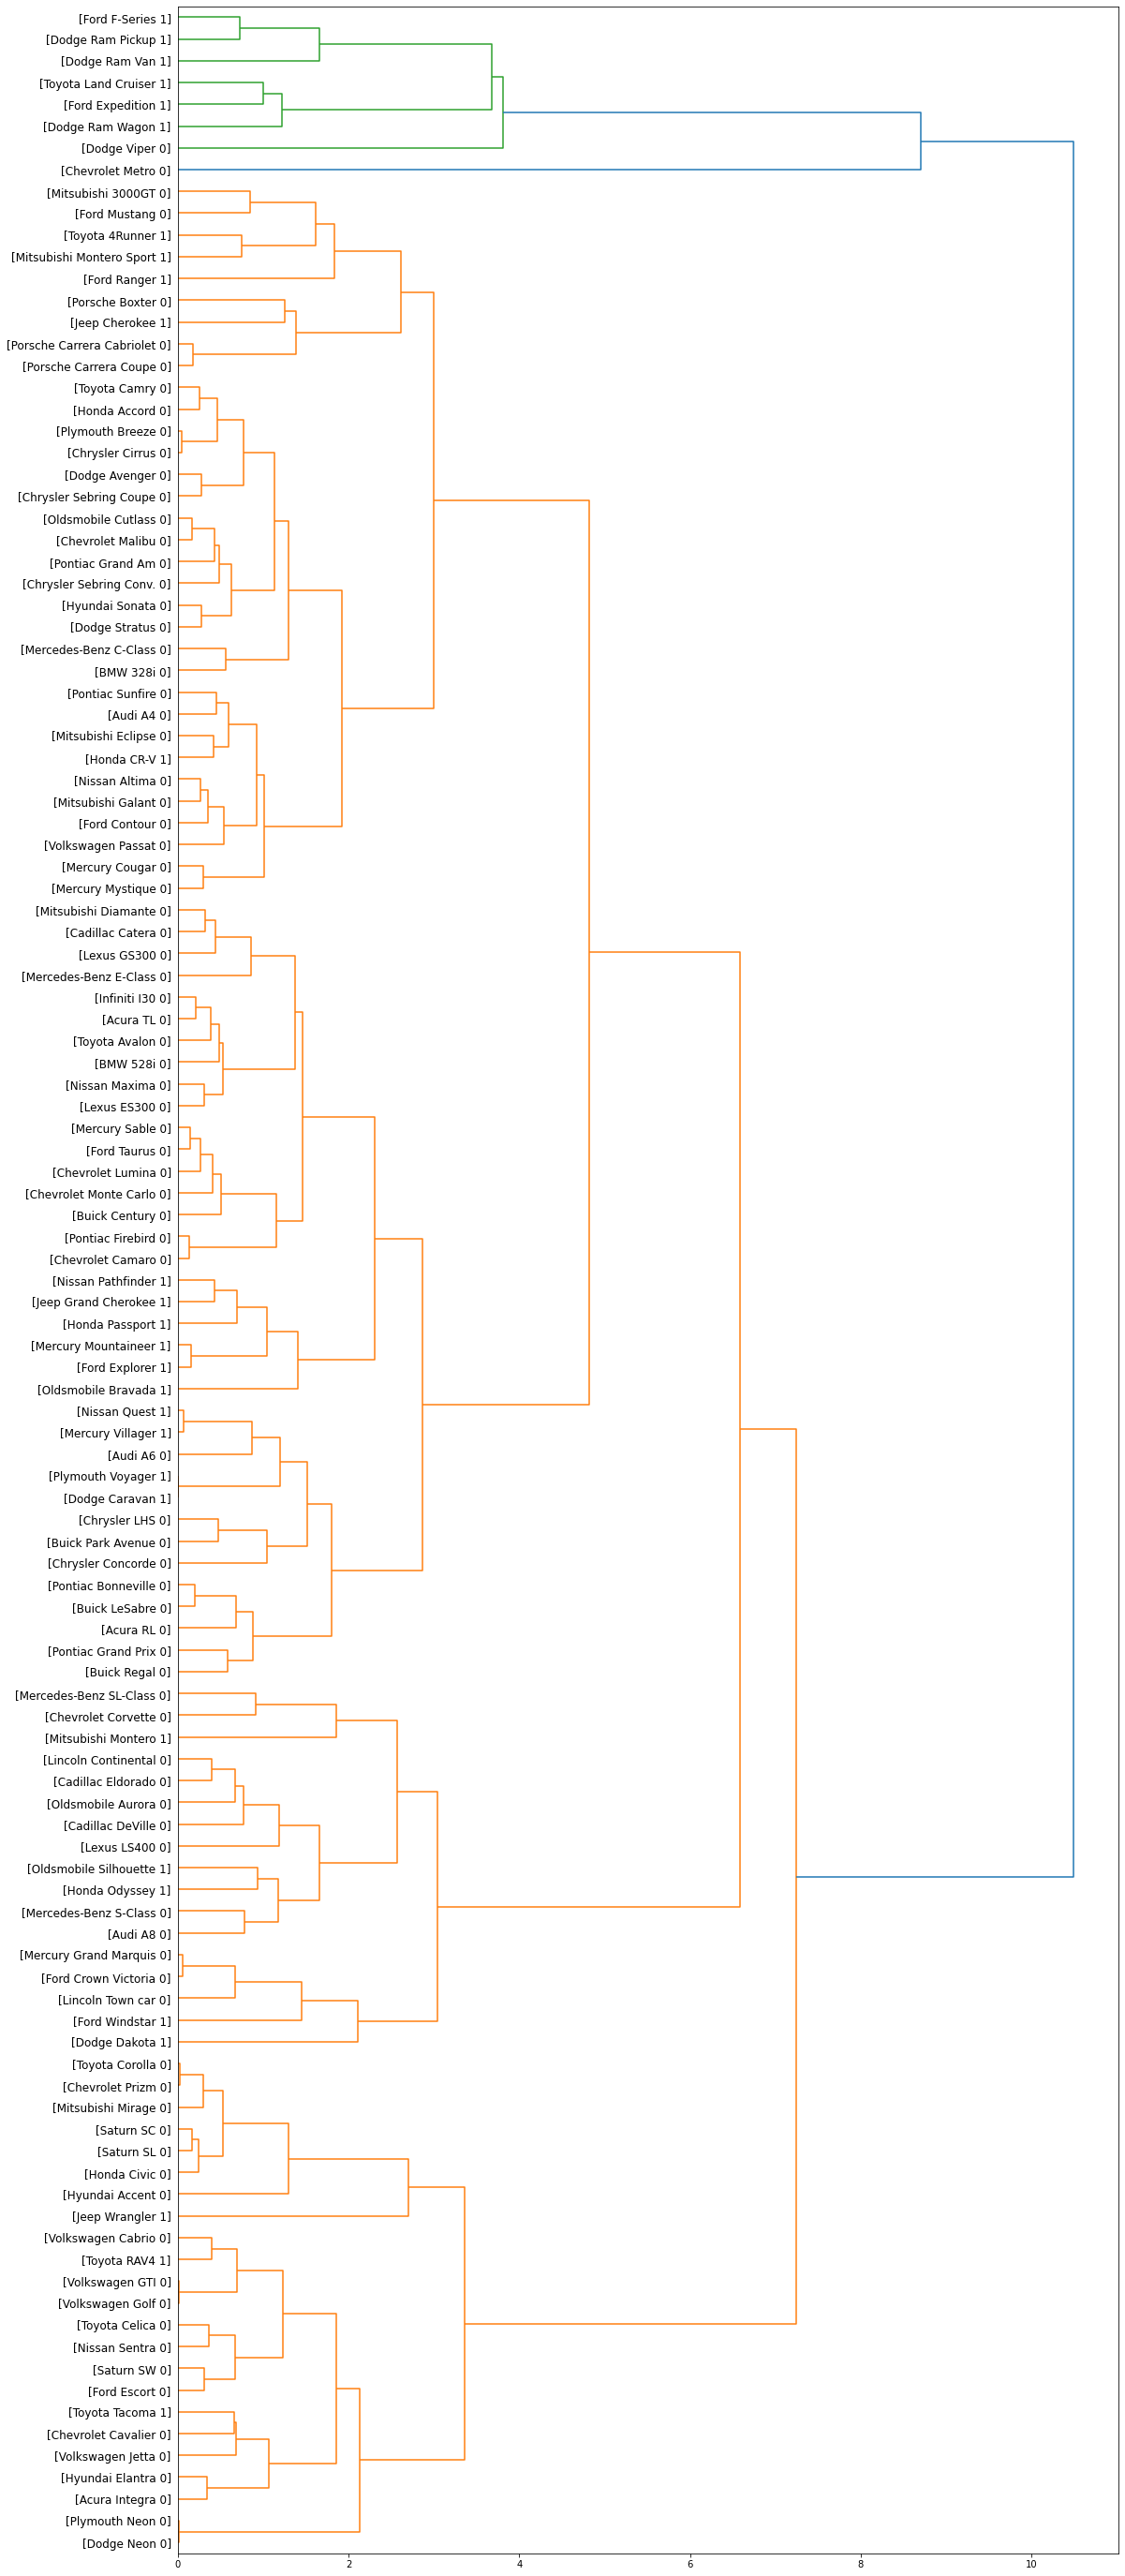

In [22]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [23]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

/Users/thiagocarvalho/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:492: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 2, 2, 3, 2, 4, 3, 2, 2, 2, 2, 2, 4, 4, 2, 1, 3, 2, 2, 2, 4, 1,
       5, 3, 3, 2, 3, 2, 1, 3, 3, 0, 0, 0, 0, 4, 2, 1, 3, 3, 2, 4, 2, 4,
       0, 3, 0, 1, 3, 3, 2, 4, 1, 1, 3, 2, 1, 3, 2, 2, 2, 4, 4, 4, 1, 3,
       3, 2, 3, 4, 3, 3, 3, 2, 4, 2, 2, 3, 2, 4, 4, 1, 3, 2, 2, 2, 3, 4,
       2, 4, 1, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1,
       3, 0, 1, 1, 3, 1, 1])

In [24]:
# a new field to our dataframe to show the cluster of each row
pdf['cluster_'] = agglom.labels_
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,3
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'mpg')

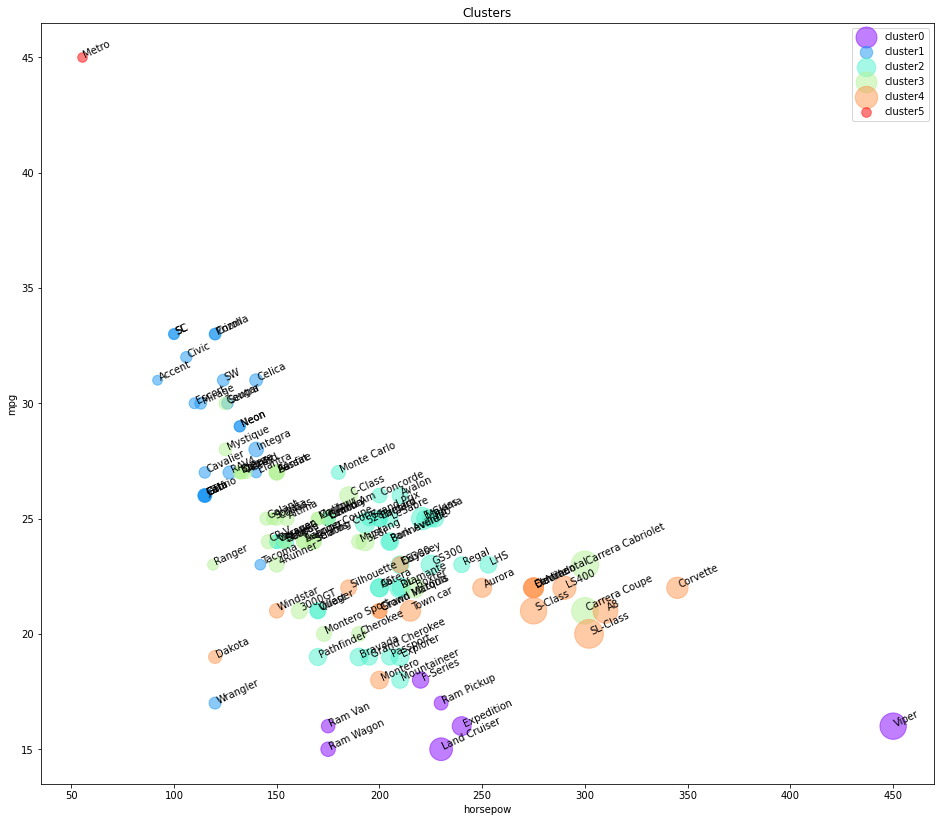

In [25]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

The distribution of each cluster using the scatter plot is not very clear where is the centroid of each cluster. Moreover, there are 2 types of vehicles in our dataset. It is convenient to distinguish the classes, and summarize the cluster.

In [26]:
# Count the number of cases in each cluster
pdf.groupby(['cluster_','type'])['cluster_'].count()
# "truck" (value of 1 in the type column) and "car" (value of 0 in the type column)

cluster_  type
0         0.0      1
          1.0      6
1         0.0     20
          1.0      3
2         0.0     26
          1.0     10
3         0.0     28
          1.0      5
4         0.0     12
          1.0      5
5         0.0      1
Name: cluster_, dtype: int64

In [27]:
# Check the characteristics of each cluster:
agg_cars = pdf.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

<ipython-input-27-fb63ecec89ff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = pdf.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   450.000000  8.000000  16.000000  69.725000
         1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   118.500000  1.890000  29.550000  14.226100
         1.0   129.666667  2.300000  22.333333  14.292000
2        0.0   203.615385  3.284615  24.223077  27.988692
         1.0   182.000000  3.420000  20.300000  26.120600
3        0.0   168.107143  2.557143  25.107143  24.693786
         1.0   155.600000  2.840000  22.000000  19.807000
4        0.0   267.666667  4.566667  21.416667  46.417417
         1.0   173.000000  3.180000  20.600000  24.308400
5        0.0    55.000000  1.000000  45.000000   9.235000

It is obvious that we have 3 main clusters with the majority of vehicles in those.

**Cars**:

-   Cluster 1: with almost high mpg, and low in horsepower.
-   Cluster 2: with good mpg and horsepower, but higher price than average.
-   Cluster 3: with low mpg, high horsepower, highest price.

**Trucks**:

-   Cluster 1: with almost highest mpg among trucks, and lowest in horsepower and price.
-   Cluster 2: with almost low mpg and medium horsepower, but higher price than average.
-   Cluster 3: with good mpg and horsepower, low price.

Please notice that we did not use **type** , and **price** of cars in the clustering process, but Hierarchical clustering could forge the clusters and discriminate them with quite high accuracy.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'mpg')

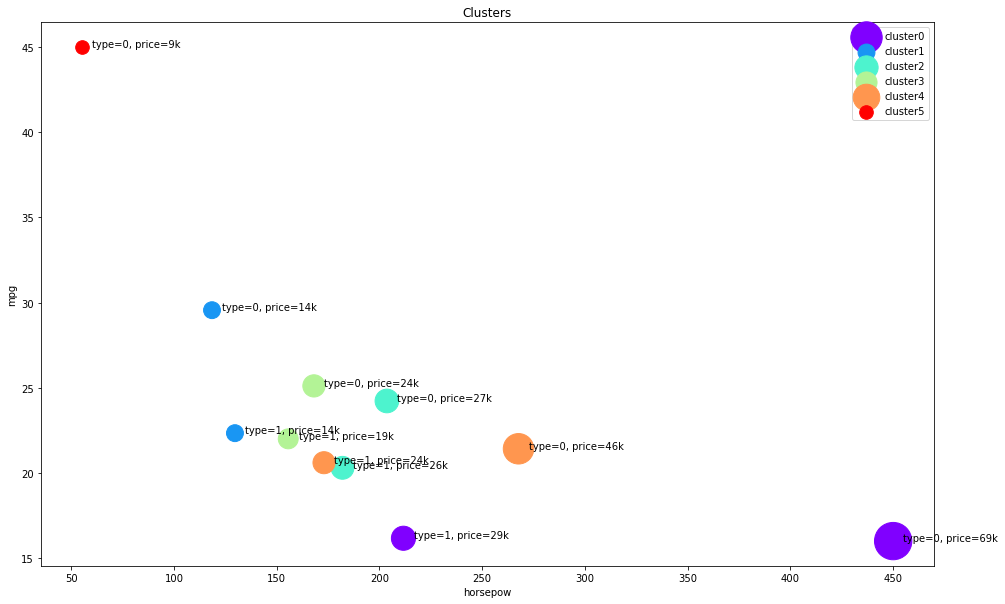

In [28]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

# K | 1 | Density-Based Clustering

Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision. 

However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor.
Additionally, Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.

In this section, the main focus will be manipulating the data and properties of DBSCAN and observing the resulting clustering.


In [30]:
# Notice: For visualization of map, you need basemap package.
# if you dont have basemap install on your machine, you can use the following line to install it
!conda install -c conda-forge  basemap matplotlib==3.1 -y
# Notice: you maight have to refresh your page and re-run the notebook after installation

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found to be incompatible with each other:

Output in format: Requested package -> Available versions

Package matplotlib conflicts for:
matplotlib==3.1
basemap -> matplotlib[version='>=1.0.0']

Package ca-certificates conflicts for:
python=3.8 -> openssl[version='>=1.1.1j,<1.1.2a'] -> ca-certificates
basemap -> python[version='>=2.7,<2.8.0a0'] -> ca-certificates



In [31]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

### Data generation

In [29]:
# Generate the data points 
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

In [32]:
# creating data points with the 3 inputs and storing the output into variables X and y
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

### Modeling

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is one of the most common clustering algorithms  which works based on density of object.

The whole idea is that if a particular point belongs to a cluster.

It works based on two parameters: Epsilon and Minimum Points  
**Epsilon** determine a specified radius that if includes enough number of points within, we call it dense area  
**minimumSamples** determine the minimum number of data points we want in a neighborhood to define a cluster.


In [33]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 1, 1, ..., 2, 0, 2])

### Distinguish outliers
--> Replace all elements with 'True' in core_samples_mask that are in the cluster, 'False' if the points are outliers.

In [34]:
# create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [35]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [36]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

### Data visualization


In [37]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

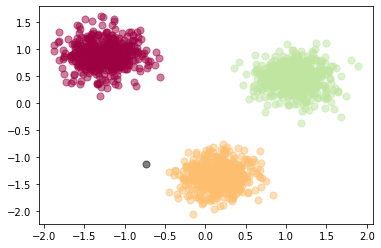

In [38]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

### To better underestand differences between partitional and density-based clusteitng:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


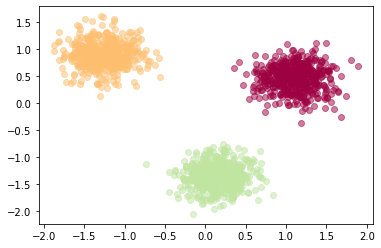

In [41]:
# cluster the above dataset into 3 clusters using k-Means
from sklearn.cluster import KMeans 
k = 3
k_means3 = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1],  c=col, marker=u'o', alpha=0.5)
plt.show()

# K | 2 | DBSCAN & scikit-learn --> Weather Station Clustering

DBSCAN is specially very good for tasks like class identification on a spatial context. 

DBSCAN algorithm can find out any arbitrary shape cluster without getting affected by noise. 


## The Task - Clustering the location of weather stations in Canada

Objetctive -->  to find the group of stations which show the same weather condition. 
DBSCAN not only finds different arbitrary shaped clusters, can find the denser part of data-centered samples by ignoring less-dense areas or noises.

**Name in table**     -->    **Meaning**
- **Stn_Name**        -->    Station Name
- **Lat**             -->	 Latitude(North+, degrees)
- **Long**            -->	 Longitude (West - , degrees)
- **Prov**            -->	 Province
- **Tm**              -->	 Mean Temperature (°C)
- **DwTm**            -->	 Days without Valid Mean Temperature
- **D**               -->	 Mean Temperature difference from Normal (1981-2010) (°C)
- **Tx**              -->	 Highest Monthly Maximum Temperature (°C)
- **DwTx**            -->	 Days without Valid Maximum Temperature
- **Tn**              -->	 Lowest Monthly Minimum Temperature (°C)
- **DwTn**            -->	 Days without Valid Minimum Temperature
- **S**               -->	 Snowfall (cm)
- **DwS**             -->	 Days without Valid Snowfall
- **S%N**             -->	 Percent of Normal (1981-2010) Snowfall
- **P**               -->	 Total Precipitation (mm)
- **DwP**             -->	 Days without Valid Precipitation
- **P%N**             -->	 Percent of Normal (1981-2010) Precipitation
- **S_G**             -->	 Snow on the ground at the end of the month (cm)
- **Pd**              -->	 Number of days with Precipitation 1.0 mm or more
- **BS**              -->	 Bright Sunshine (hours)
- **DwBS**            -->	 Days without Valid Bright Sunshine
- **BS%**             -->	 Percent of Normal (1981-2010) Bright Sunshine
- **HDD**             -->	 Degree Days below 18 °C
- **CDD**             -->	 Degree Days above 18 °C
- **Stn_No**          -->	 Climate station identifier (first 3 digits indicate drainage basin, last 4 characters are for sorting alphabetically).
- **NA**              -->	 Not Available

In [48]:
# Importing Libraries
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [49]:
# Read the file and assigning it to a data frame
folder = '/Users/thiagocarvalho/Documents/databases/'
pdf  = pd.read_csv(folder+'weather-stations20140101-20141231.csv')
pdf.head() 

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


### Cleaning

In [50]:
# Remove rows that dont have any value in the **Tm** field
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


### Visualization

In [59]:
!conda activate py39


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [ ]:
!conda install basemap

In [ ]:
# Visualization of stations on map using basemap package. 
# The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python.
# Basemap does not do any plotting on it’s own, 
# but provides the facilities to transform coordinates to a map projections. 
# Please notice that the size of each data points represents 
# the average of maximum temperature for each station in a year. 

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()

### Clustering of stations based on their location i.e. Lat & Lon

In [ ]:
# **DBSCAN** form sklearn library can runs DBSCAN clustering from vector array or distance matrix. 
# In our case, we pass it the Numpy array Clus_dataSet to find core samples of high density and 
# expands clusters from them. 


from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

As you can see for outliers, the cluster label is -1


In [ ]:
set(labels)

### Visualization of clusters based on location

Now, we can visualize the clusters using basemap:


In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

### Clustering of stations based on their location, mean, max, and min Temperature

In [ ]:
# DBSCAN on a 5-dimensional dataset:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym','Tx','Tm','Tn']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

### Visualization of clusters based on location and Temperture


In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

# L | Content Based Filtering ( recommendation system )

##### Advantages

-   Learns user's preferences
-   Highly personalized for the user

##### Disadvantages

-   Doesn't take into account what others think of the item, so low quality item recommendations might happen
-   Extracting data is not always intuitive
-   Determining what characteristics of the item the user dislikes or likes is not always obvious

<a id="ref1"></a>

# Acquiring the Data


In [61]:
# Importing Libraries
# Dataframe manipulation library
import pandas as pd
# Math functions, we'll only need the sqrt function so let's import only that
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
# Read the file and assigning it to a data frame
folder = '/Users/thiagocarvalho/Documents/databases/'

#Storing the movie information into a pandas dataframe
movies_df = pd.read_csv(folder+'movies.csv')
#Storing the user information into a pandas dataframe
ratings_df = pd.read_csv(folder+'ratings.csv')
#Head is a function that gets the first N rows of a dataframe. N's default is 5.
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<a id="ref2"></a>

# Preprocessing


In [63]:
# Remove the year from the **title** column by using pandas' replace function and store in a new **year** column.

# Using regular expressions to find a year stored between parentheses
# We specify the parantheses so we don't conflict with movies that have years in their titles
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)

# Removing the parentheses
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)

# Removing the years from the 'title' column
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')

# Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [64]:
#Every genre is separated by a | so we simply have to call the split function on |
movies_df['genres'] = movies_df.genres.str.split('|')
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [65]:
#Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
moviesWithGenres_df = movies_df.copy()

#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in movies_df.iterrows():
    for genre in row['genres']:
        moviesWithGenres_df.at[index, genre] = 1
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
moviesWithGenres_df = moviesWithGenres_df.fillna(0)
moviesWithGenres_df.head()

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next, let's look at the ratings dataframe.


In [66]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


In [67]:
# A rating and a timestamp are registred when a user gives a reviews. We won't need both. Dropping timestamp column
ratings_df = ratings_df.drop('timestamp', 1)
ratings_df.head()

,userId,movieId,rating
0,1,169,2.5
1,1,2471,3.0
2,1,48516,5.0
3,2,2571,3.5
4,2,109487,4.0


<a id="ref3"></a>

# Content-Based recommendation system


**Content-Based** or **Item-Item recommendation systems**: This technique attempts to figure out what a user's favourite aspects of an item is, and then recommends items that present those aspects. 


In our case, we're going to try to figure out the input's favorite genres from the movies and ratings given.

In [68]:
# create an input user to recommend movies
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

,title,rating
0,"Breakfast Club, The",5.0
1,Toy Story,3.5
2,Jumanji,2.0
3,Pulp Fiction,5.0
4,Akira,4.5


#### Add movieId to input user

In [69]:
# Extract the input movie's ID's from the movies dataframe and add them into it

#Filtering out the movies by title
inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]

In [70]:
#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputId, inputMovies)

In [71]:
#Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop('genres', 1).drop('year', 1)

In [72]:
#Final input dataframe
#If a movie you added in above isn't here, then it might not be in the original 
#dataframe or it might spelled differently, please check capitalisation.
inputMovies

,movieId,title,rating
0,1,Toy Story,3.5
1,2,Jumanji,2.0
2,296,Pulp Fiction,5.0
3,1274,Akira,4.5
4,1968,"Breakfast Club, The",5.0


In [73]:
# get the subset of movies that the input has watched from the Dataframe
# Filtering out the movies from the input
userMovies = moviesWithGenres_df[moviesWithGenres_df['movieId'].isin(inputMovies['movieId'].tolist())]
userMovies

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
293,296,Pulp Fiction,"[Comedy, Crime, Drama, Thriller]",1994,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1246,1274,Akira,"[Action, Adventure, Animation, Sci-Fi]",1988,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1885,1968,"Breakfast Club, The","[Comedy, Drama]",1985,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We'll only need the actual genre table, so let's clean this up a bit by resetting the index and dropping the movieId, title, genres and year columns.


In [75]:
#Resetting the index to avoid future issues
userMovies = userMovies.reset_index(drop=True)
#Dropping unnecessary columns to avoid issues (dropping the movieId, title, genres and year columns)
userGenreTable = userMovies.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
userGenreTable

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Start learning the input's preferences: to turn each genre into weights. 

In [76]:
# Use input's reviews and multiplying them into the input's genre table
inputMovies['rating']

0    3.5
1    2.0
2    5.0
3    4.5
4    5.0
Name: rating, dtype: float64

In [77]:
#Dot produt to get weights
userProfile = userGenreTable.transpose().dot(inputMovies['rating']) # a dot product between a matrix and a vector

#The user profile
userProfile

Adventure             10.0
Animation              8.0
Children               5.5
Comedy                13.5
Fantasy                5.5
Romance                0.0
Drama                 10.0
Action                 4.5
Crime                  5.0
Thriller               5.0
Horror                 0.0
Mystery                0.0
Sci-Fi                 4.5
IMAX                   0.0
Documentary            0.0
War                    0.0
Musical                0.0
Western                0.0
Film-Noir              0.0
(no genres listed)     0.0
dtype: float64

The weights for every of the user's preferences: The User Profile. 

Using this, we can recommend movies that satisfy the user's preferences.

In [78]:
#Now let's get the genres of every movie in our original dataframe
genreTable = moviesWithGenres_df.set_index(moviesWithGenres_df['movieId'])
genreTable.head()

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,,
1,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
#And drop the unnecessary information
genreTable = genreTable.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
genreTable.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
genreTable.shape

(34208, 20)

In [81]:
#Multiply the genres by the weights and then take the weighted average
recommendationTable_df = ((genreTable*userProfile).sum(axis=1))/(userProfile.sum())
recommendationTable_df.head()

movieId
1    0.594406
2    0.293706
3    0.188811
4    0.328671
5    0.188811
dtype: float64

In [82]:
#Sort our recommendations in descending order
recommendationTable_df = recommendationTable_df.sort_values(ascending=False)
#Just a peek at the values
recommendationTable_df.head()

movieId
5018      0.748252
26093     0.734266
27344     0.720280
148775    0.685315
6902      0.678322
dtype: float64

In [83]:
#The final recommendation table
movies_df.loc[movies_df['movieId'].isin(recommendationTable_df.head(20).keys())]

,movieId,title,genres,year
664,673,Space Jam,"[Adventure, Animation, Children, Comedy, Fanta...",1996
1824,1907,Mulan,"[Adventure, Animation, Children, Comedy, Drama...",1998
2902,2987,Who Framed Roger Rabbit?,"[Adventure, Animation, Children, Comedy, Crime...",1988
4923,5018,Motorama,"[Adventure, Comedy, Crime, Drama, Fantasy, Mys...",1991
6793,6902,Interstate 60,"[Adventure, Comedy, Drama, Fantasy, Mystery, S...",2002
8605,26093,"Wonderful World of the Brothers Grimm, The","[Adventure, Animation, Children, Comedy, Drama...",1962
8783,26340,"Twelve Tasks of Asterix, The (Les douze travau...","[Action, Adventure, Animation, Children, Comed...",1976
9296,27344,Revolutionary Girl Utena: Adolescence of Utena...,"[Action, Adventure, Animation, Comedy, Drama, ...",1999
9825,32031,Robots,"[Adventure, Animation, Children, Comedy, Fanta...",2005
11716,51632,Atlantis: Milo's Return,"[Action, Adventure, Animation, Children, Comed...",2003


# M | Collaborative Filtering ( recommendation system )

##### Advantages

-   Takes other user's ratings into consideration
-   Doesn't need to study or extract information from the recommended item
-   Adapts to the user's interests which might change over time

##### Disadvantages

-   Approximation function can be slow
-   There might be a low of amount of users to approximate
-   Privacy issues when trying to learn the user's preferences

# Preprocessing

First, let's get all of the imports out of the way:


In [84]:
#Dataframe manipulation library
import pandas as pd
#Math functions, we'll only need the sqrt function so let's import only that
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
# Read the file and assigning it to a data frame
folder = '/Users/thiagocarvalho/Documents/databases/'

#Storing the movie information into a pandas dataframe
movies_df = pd.read_csv(folder+'movies.csv')
#Storing the user information into a pandas dataframe
ratings_df = pd.read_csv(folder+'ratings.csv')

In [86]:
#Head is a function that gets the first N rows of a dataframe. N's default is 5.
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [87]:
# Remove the year from the **title** column by using pandas' replace function and store in a new **year** column

#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())

In [88]:
# Look at the result
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [89]:
# Dropping the genres column
movies_df = movies_df.drop('genres', 1)

In [90]:
# Final movies dataframe
movies_df.head()

,movieId,title,year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


In [91]:
# Look at the ratings dataframe
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


In [92]:
# A rating and a timestamp are registred when a user gives a reviews. We won't need both. Dropping timestamp column
ratings_df = ratings_df.drop('timestamp', 1)

In [93]:
ratings_df.head()

,userId,movieId,rating
0,1,169,2.5
1,1,2471,3.0
2,1,48516,5.0
3,2,2571,3.5
4,2,109487,4.0


# Collaborative Filtering

Now, time to start our work on recommendation systems. 

The first technique we're going to take a look at is called **Collaborative Filtering**, which is also known as **User-User Filtering**. As hinted by its alternate name, this technique uses other users to recommend items to the input user. It attempts to find users that have similar preferences and opinions as the input and then recommends items that they have liked to the input. There are several methods of finding similar users (Even some making use of Machine Learning), and the one we will be using here is going to be based on the **Pearson Correlation Function**.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%205/images/User_Item.png" width=800px>

The process for creating a User Based recommendation system is as follows:

-   Select a user with the movies the user has watched
-   Based on his rating to movies, find the top X neighbours 
-   Get the watched movie record of the user for each neighbour.
-   Calculate a similarity score using some formula
-   Recommend the items with the highest score

Let's begin by creating an input user to recommend movies to:

Notice: To add more movies, simply increase the amount of elements in the userInput. Feel free to add more in! Just be sure to write it in with capital letters and if a movie starts with a "The", like "The Matrix" then write it in like this: 'Matrix, The' .


In [94]:
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

,title,rating
0,"Breakfast Club, The",5.0
1,Toy Story,3.5
2,Jumanji,2.0
3,Pulp Fiction,5.0
4,Akira,4.5


#### Add movieId to input user

In [95]:
#Filtering out the movies by title
inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]

In [96]:
#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputId, inputMovies)

In [97]:
#Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop('year', 1)

In [98]:
#Final input dataframe
#If a movie you added in above isn't here, then it might not be in the original 
#dataframe or it might spelled differently, please check capitalisation.
inputMovies

,movieId,title,rating
0,1,Toy Story,3.5
1,2,Jumanji,2.0
2,296,Pulp Fiction,5.0
3,1274,Akira,4.5
4,1968,"Breakfast Club, The",5.0


#### The users who has seen the same movies

Get the subset of users that have watched and reviewed the movies

In [99]:
# Filtering out users that have watched movies that the input has watched and storing it
userSubset = ratings_df[ratings_df['movieId'].isin(inputMovies['movieId'].tolist())]
userSubset.head()

,userId,movieId,rating
19,4,296,4.0
441,12,1968,3.0
479,13,2,2.0
531,13,1274,5.0
681,14,296,2.0


In [100]:
# Groupby -  group up the rows by user ID
userSubsetGroup = userSubset.groupby(['userId'])

In [101]:
userSubsetGroup.get_group(1130)

,userId,movieId,rating
104167,1130,1,0.5
104168,1130,2,4.0
104214,1130,296,4.0
104363,1130,1274,4.5
104443,1130,1968,4.5


Let's also sort these groups so the users that share the most movies in common with the input have higher priority. This provides a richer recommendation since we won't go through every single user.


In [102]:
#Sorting it so users with movie most in common with the input will have priority
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)

In [103]:
#look at the first 3 users
userSubsetGroup[0:3]

[(75,
        userId  movieId  rating
  7507      75        1     5.0
  7508      75        2     3.5
  7540      75      296     5.0
  7633      75     1274     4.5
  7673      75     1968     5.0),
 (106,
        userId  movieId  rating
  9083     106        1     2.5
  9084     106        2     3.0
  9115     106      296     3.5
  9198     106     1274     3.0
  9238     106     1968     3.5),
 (686,
         userId  movieId  rating
  61336     686        1     4.0
  61337     686        2     3.0
  61377     686      296     4.0
  61478     686     1274     4.0
  61569     686     1968     5.0)]

#### Similarity of users to input user

Next, we are going to compare all users (not really all !!!) to our specified user and find the one that is most similar.  
we're going to find out how similar each user is to the input through the **Pearson Correlation Coefficient**. It is used to measure the strength of a linear association between two variables. The formula for finding this coefficient between sets X and Y with N values can be seen in the image below. 

Why Pearson Correlation?

Pearson correlation is invariant to scaling, i.e. multiplying all elements by a nonzero constant or adding any constant to all elements. For example, if you have two vectors X and Y,then, pearson(X, Y) == pearson(X, 2 * Y + 3). This is a pretty important property in recommendation systems because for example two users might rate two series of items totally different in terms of absolute rates, but they would be similar users (i.e. with similar ideas) with similar rates in various scales .

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/bd1ccc2979b0fd1c1aec96e386f686ae874f9ec0 "Pearson Correlation")

The values given by the formula vary from r = -1 to r = 1, where 1 forms a direct correlation between the two entities (it means a perfect positive correlation) and -1 forms a perfect negative correlation. 

In our case, a 1 means that the two users have similar tastes while a -1 means the opposite.


In [104]:
#select a subset of users to iterate through (to be faster than run all the base)
userSubsetGroup = userSubsetGroup[0:100]

In [105]:
#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorrelationDict = {}

#For every user group in our subset
for name, group in userSubsetGroup:
    #Let's start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='movieId')
    inputMovies = inputMovies.sort_values(by='movieId')
    #Get the N for the formula
    nRatings = len(group)
    #Get the review scores for the movies that they both have in common
    temp_df = inputMovies[inputMovies['movieId'].isin(group['movieId'].tolist())]
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp_df['rating'].tolist()
    #Let's also put the current user group reviews in a list format
    tempGroupList = group['rating'].tolist()
    #Now let's calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0


In [106]:
pearsonCorrelationDict.items()

dict_items([(75, 0.8272781516947562), (106, 0.5860090386731182), (686, 0.8320502943378437), (815, 0.5765566601970551), (1040, 0.9434563530497265), (1130, 0.2891574659831201), (1502, 0.8770580193070299), (1599, 0.4385290096535153), (1625, 0.716114874039432), (1950, 0.179028718509858), (2065, 0.4385290096535153), (2128, 0.5860090386731196), (2432, 0.1386750490563073), (2791, 0.8770580193070299), (2839, 0.8204126541423674), (2948, -0.11720180773462392), (3025, 0.45124262819713973), (3040, 0.89514359254929), (3186, 0.6784622064861935), (3271, 0.26989594817970664), (3429, 0.0), (3734, -0.15041420939904673), (4099, 0.05860090386731196), (4208, 0.29417420270727607), (4282, -0.4385290096535115), (4292, 0.6564386345361464), (4415, -0.11183835382312353), (4586, -0.9024852563942795), (4725, -0.08006407690254357), (4818, 0.4885967564883424), (5104, 0.7674257668936507), (5165, -0.4385290096535153), (5547, 0.17200522903844556), (6082, -0.04728779924109591), (6207, 0.9615384615384616), (6366, 0.65779

In [107]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,userId
0,0.827278,75
1,0.586009,106
2,0.832050,686
3,0.576557,815
4,0.943456,1040


#### The top x similar users to input user

Now let's get the top 50 users that are most similar to the input.


In [108]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers.head()

,similarityIndex,userId
64,0.961678,12325
34,0.961538,6207
55,0.961538,10707
67,0.960769,13053
4,0.943456,1040


#### Rating of selected users to all movies
Take the weighted average of the ratings of the movies using the Pearson Correlation as the weight. 


In [109]:
# By merging of topUsers and ratings_df its possible to get the movies watched by the users in our **pearsonDF** from 
# the ratings dataframe and then store their correlation in a new column called _similarityIndex":
topUsersRating=topUsers.merge(ratings_df, left_on='userId', right_on='userId', how='inner')
topUsersRating.head()

,similarityIndex,userId,movieId,rating
0,0.961678,12325,1,3.5
1,0.961678,12325,2,1.5
2,0.961678,12325,3,3.0
3,0.961678,12325,5,0.5
4,0.961678,12325,6,2.5


In [110]:
#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

,similarityIndex,userId,movieId,rating,weightedRating
0,0.961678,12325,1,3.5,3.365874
1,0.961678,12325,2,1.5,1.442517
2,0.961678,12325,3,3.0,2.885035
3,0.961678,12325,5,0.5,0.480839
4,0.961678,12325,6,2.5,2.404196


In [111]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
movieId,,
1,38.376281,140.800834
2,38.376281,96.656745
3,10.253981,27.254477
4,0.929294,2.787882
5,11.723262,27.151751


In [112]:
#Creates an empty dataframe
recommendation_df = pd.DataFrame()
#Now we take the weighted average
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df.head()

,weighted average recommendation score,movieId
movieId,,
1,3.668955,1
2,2.518658,2
3,2.657941,3
4,3.000000,4
5,2.316058,5


In [113]:
# Sort the top 20 movies that the algorithm recommended
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(10)

,weighted average recommendation score,movieId
movieId,,
5073,5.0,5073
3329,5.0,3329
2284,5.0,2284
26801,5.0,26801
6776,5.0,6776
6672,5.0,6672
3759,5.0,3759
3769,5.0,3769
3775,5.0,3775


In [114]:
movies_df.loc[movies_df['movieId'].isin(recommendation_df.head(10)['movieId'].tolist())]

,movieId,title,year
2200,2284,Bandit Queen,1994
3243,3329,"Year My Voice Broke, The",1987
3669,3759,Fun and Fancy Free,1947
3679,3769,Thunderbolt and Lightfoot,1974
3685,3775,Make Mine Music,1946
4978,5073,"Son's Room, The (Stanza del figlio, La)",2001
6563,6672,War Photographer,2001
6667,6776,Lagaan: Once Upon a Time in India,2001
9064,26801,Dragon Inn (Sun lung moon hak chan),1992
18106,90531,Shame,2011
